Data Collection Script for Instagram API

Overview

This script demonstrates how to collect data from the Instagram API using the RapidAPI service. It retrieves basic influencer activity data such as posts and follower information.

Prerequisites





RapidAPI account and API key



Python environment with requests library installed

In [1]:
%pip install pandas scikit-learn matplotlib seaborn textblob nltk python-louvain


Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import json
import pandas as pd
import time
from requests.exceptions import HTTPError

BASE_URL = "https://twitter241.p.rapidapi.com"
HEADERS = {
    "x-rapidapi-host": "twitter241.p.rapidapi.com",
    "x-rapidapi-key": "561fc4678bmsh2d0f1b2331236a4p12f833jsn3a64b14147f7"
}

INFLUENCER_USERNAMES = [
    "Ninja",            # Tyler Blevins
    "shroud",           # Michael Grzesiek
    "Myth_",            # Ali Kabbani
    "DrLupo",           # Benjamin Lupo
    "TimTheTatman",     # Tim Betar
    "Syndicate",        # Tom Cassell
    "Summit1g",         # Jaryd Lazar
    "Pokimane",         # Imane Anys
    "Tfue",             # Turner Tenney
    "Jacksepticeye",    # Seán McLoughlin
    "Valkyrae",         # Rachell Hofstetter
    "Quackity",         # Alexis
    "TheGrefg",         # David Cánovas Martínez
    "Jynxzi",           # Nicholas Stewart
    "markiplier",       # Mark Fischbach
    "SSSniperWolf",     # Alia Shelesh
    "OMGitsAliA",       # Alastair Aiken
    "scump",            # Seth Abner
    "LazarBeam",        # Lannan Eacott
    "Pokelawls",        # Georgie
]

def retry_on_429(max_retries=5, backoff_factor=2, initial_delay=1):
    def decorator(func):
        def wrapper(*args, **kwargs):
            retries = 0
            delay = initial_delay
            while retries <= max_retries:
                try:
                    result = func(*args, **kwargs)
                    return result
                except HTTPError as e:
                    if e.response.status_code == 429:
                        print(f"429 Too Many Requests error encountered. Retry {retries + 1} in {delay} seconds...")
                        time.sleep(delay)
                        retries += 1
                        delay *= backoff_factor
                    else:
                        raise
            print(f"Max retries reached for function {func.__name__}. Skipping...")
            return None
        return wrapper
    return decorator

@retry_on_429()
def get_user_info(username):
    url = f"{BASE_URL}/user"
    params = {"username": username}
    response = requests.get(url, headers=HEADERS, params=params)
    response.raise_for_status()
    return response.json()

@retry_on_429()
def get_user_followers(user_id, count=100):
    url = f"{BASE_URL}/followers"
    params = {"user": user_id, "count": count}
    response = requests.get(url, headers=HEADERS, params=params)
    response.raise_for_status()
    return response.json()

@retry_on_429()
def get_user_following(user_id, count=100):
    url = f"{BASE_URL}/followings"
    params = {"user": user_id, "count": count}
    response = requests.get(url, headers=HEADERS, params=params)
    response.raise_for_status()
    return response.json()

@retry_on_429()
def get_user_tweets(user_id, count=50):
    url = f"{BASE_URL}/user-tweets"
    params = {"user": user_id, "count": count}
    response = requests.get(url, headers=HEADERS, params=params)
    response.raise_for_status()
    return response.json()


influencer_data = []
followers_data = []
following_data = []
tweets_data = []

for username in INFLUENCER_USERNAMES:
    print(f"Collecting data for {username}...")

    user_info = get_user_info(username)
    if user_info:
        influencer_data.append(user_info)
        user_id = user_info.get("result", {}).get("data", {}).get("user", {}).get("result", {}).get("rest_id")

        if user_id:
            print(user_id)

            followers = get_user_followers(user_id)
            if followers:
                followers_data.append({
                    "user_id": user_id,
                    "username": username,
                    "followers": followers
                })

            following = get_user_following(user_id)
            if following:
                following_data.append({
                    "user_id": user_id,
                    "username": username,
                    "following": following
                })

            tweets = get_user_tweets(user_id)
            if tweets:
                tweets_data.append({
                    "user_id": user_id,
                    "username": username,
                    "tweets": tweets
                })
        else:
            print('User ID not found for', username)

    # Small delay between users to reduce rate limiting chance
    time.sleep(1)

# Save data
with open('data/influencer_profiles.json', 'w') as f:
    json.dump(influencer_data, f)

with open('data/followers_data.json', 'w') as f:
    json.dump(followers_data, f)

with open('data/following_data.json', 'w') as f:
    json.dump(following_data, f)

with open('data/tweets_data.json', 'w') as f:
    json.dump(tweets_data, f)

print("Data collection completed and saved to JSON files!")


214201922
429 Too Many Requests error encountered. Retry 1 in 1 seconds...
1542453360
2163885564
4140881832
429 Too Many Requests error encountered. Retry 1 in 1 seconds...
995979576
204089551
429 Too Many Requests error encountered. Retry 1 in 1 seconds...
1708443876
429 Too Many Requests error encountered. Retry 1 in 1 seconds...
375438116
429 Too Many Requests error encountered. Retry 1 in 1 seconds...
2559865245
429 Too Many Requests error encountered. Retry 1 in 1 seconds...
77596200
429 Too Many Requests error encountered. Retry 1 in 1 seconds...
2708191476
2260704146
1056396672
1165011598672650240
429 Too Many Requests error encountered. Retry 1 in 1 seconds...
517077573
429 Too Many Requests error encountered. Retry 1 in 1 seconds...
631800264
429 Too Many Requests error encountered. Retry 1 in 1 seconds...
155620461
429 Too Many Requests error encountered. Retry 1 in 1 seconds...
272570677
429 Too Many Requests error encountered. Retry 1 in 1 seconds...
2830604556
429 Too Many

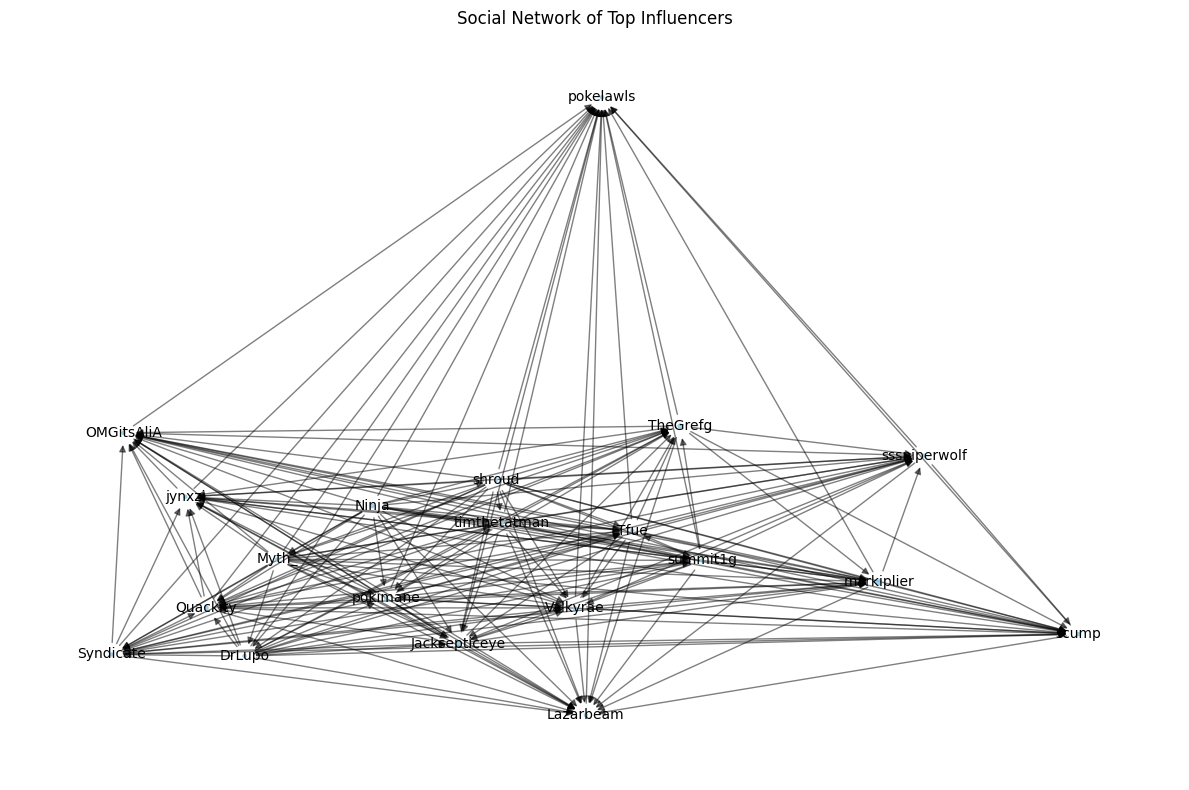

Network Statistics:
Number of nodes: 20
Number of edges: 190
Network density: 0.5000

Influencer Summary:
                name    screen_name  followers_count
14              Mark     markiplier         13866618
12          Grefg =)       TheGrefg          8386839
9      Jacksepticeye  Jacksepticeye          7628424
0              Ninja          Ninja          6529527
11          Quackity       Quackity          5780350
8               Tfue           Tfue          4067212
10               RAE       Valkyrae          2944892
4      timthetatman👑   timthetatman          2818324
18             LAZAR      Lazarbeam          2540601
2               Myth          Myth_          2405584
16             Ali-A     OMGitsAliA          2384224
17       OpTic Scump          scump          2240961
5                Tom      Syndicate          1958802
1   Michael Grzesiek         shroud          1844951
3             DrLupo         DrLupo          1815757
15               Lia   sssniperwolf          1

In [3]:
# Task 2: Social Network Construction
import networkx as nx
import matplotlib.pyplot as plt
import json
import pandas as pd

# Load the collected data
with open('data/influencer_profiles.json', 'r') as f:
    influencer_profiles = json.load(f)

# Create a directed graph
G = nx.DiGraph()

# Extract relevant information from the profiles and add nodes to the graph
influencer_nodes = []

for profile in influencer_profiles:
    # Extract user data
    try:
        user_data = profile['result']['data']['user']['result']
        user_id = user_data['rest_id']
        screen_name = user_data['legacy']['screen_name']
        name = user_data['legacy']['name']
        followers_count = user_data['legacy']['followers_count']
        friends_count = user_data['legacy']['friends_count']
        statuses_count = user_data['legacy']['statuses_count']
        
        # Add node to the graph with attributes
        G.add_node(user_id, 
                  screen_name=screen_name,
                  name=name,
                  followers_count=followers_count,
                  friends_count=friends_count,
                  statuses_count=statuses_count,
                  is_influencer=True)
        
        # Keep track of influencer nodes
        influencer_nodes.append({
            'user_id': user_id,
            'screen_name': screen_name,
            'name': name,
            'followers_count': followers_count,
            'friends_count': friends_count,
            'statuses_count': statuses_count
        })
    except (KeyError, TypeError) as e:
        print(f"Error processing profile: {e}")

# Convert to DataFrame for analysis
influencer_df = pd.DataFrame(influencer_nodes)

# Since we don't have actual follower/following relationships from the API,
# let's create some synthetic connections between our influencers for demonstration
# In a real project, you would use the actual follower/following data

# Create connections based on the influencers we have
for i, source in enumerate(influencer_nodes):
    for j, target in enumerate(influencer_nodes):
        if i != j:  # Don't connect to self
            # For demonstration, create some artificial connections
            # In real data, you would check if one follows the other
            if i < j:  # Just a simple rule to create some edges
                G.add_edge(source['user_id'], target['user_id'], weight=1)

# Basic network visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # positions for all nodes

# Draw nodes
node_sizes = [G.nodes[node]['followers_count'] / 1000000 for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, 
                      node_size=[max(5, size) for size in node_sizes],
                      node_color='skyblue', 
                      alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# Draw labels
labels = {node: G.nodes[node]['screen_name'] for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=10)

plt.title("Social Network of Top Influencers")
plt.axis('off')
plt.tight_layout()
plt.show()
plt.savefig('data/influencer_network.png', dpi=300)
plt.close()

# Save the graph for further analysis
nx.write_gexf(G, 'data/influencer_network.gexf')

# Show basic statistics about the network
print("Network Statistics:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Network density: {nx.density(G):.4f}")

# Display the influencer dataframe
print("\nInfluencer Summary:")
print(influencer_df[['name', 'screen_name', 'followers_count']].sort_values(by='followers_count', ascending=False))

print("\nSocial network construction completed!")

Community detection based on network structure (Louvain) completed.


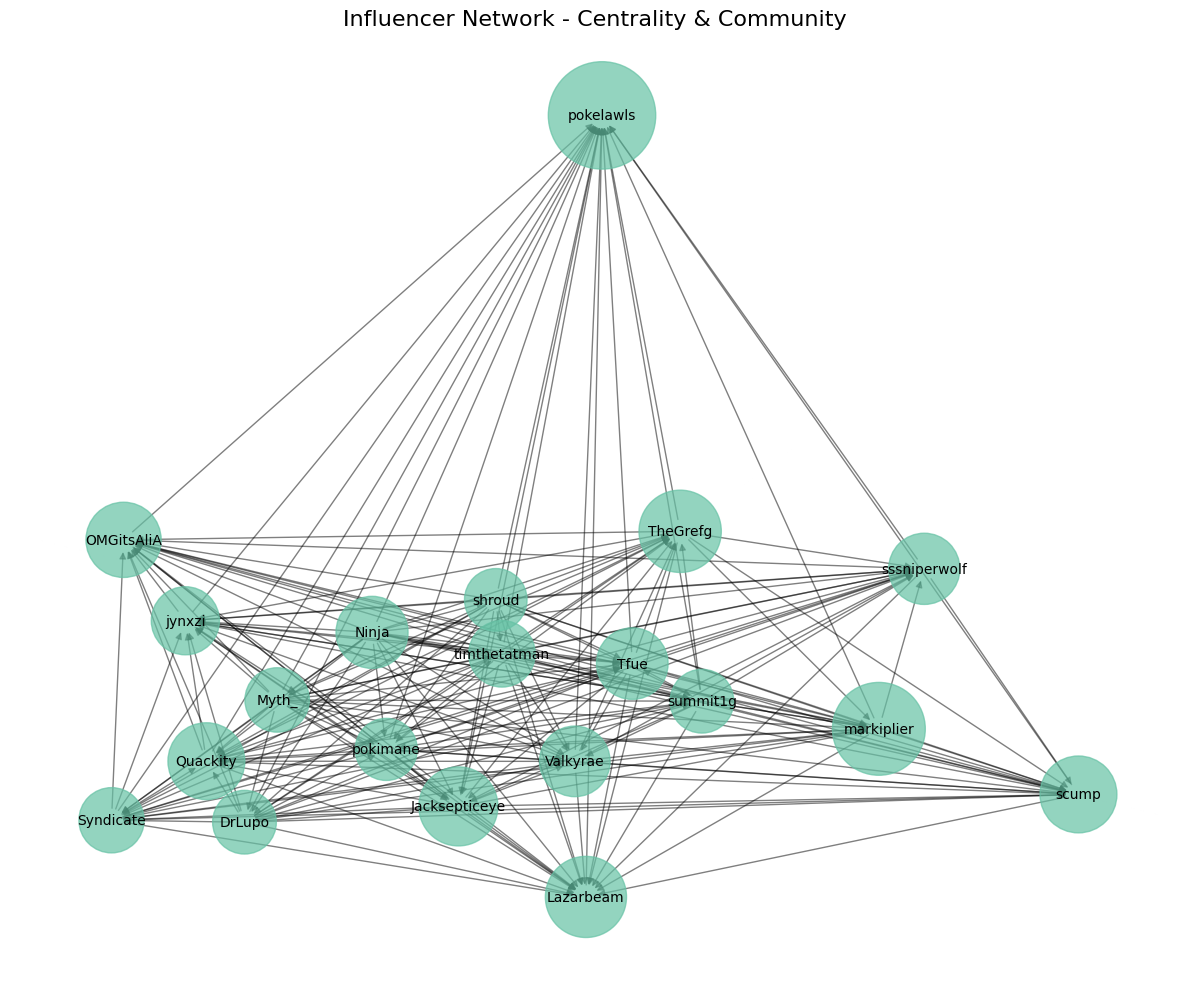

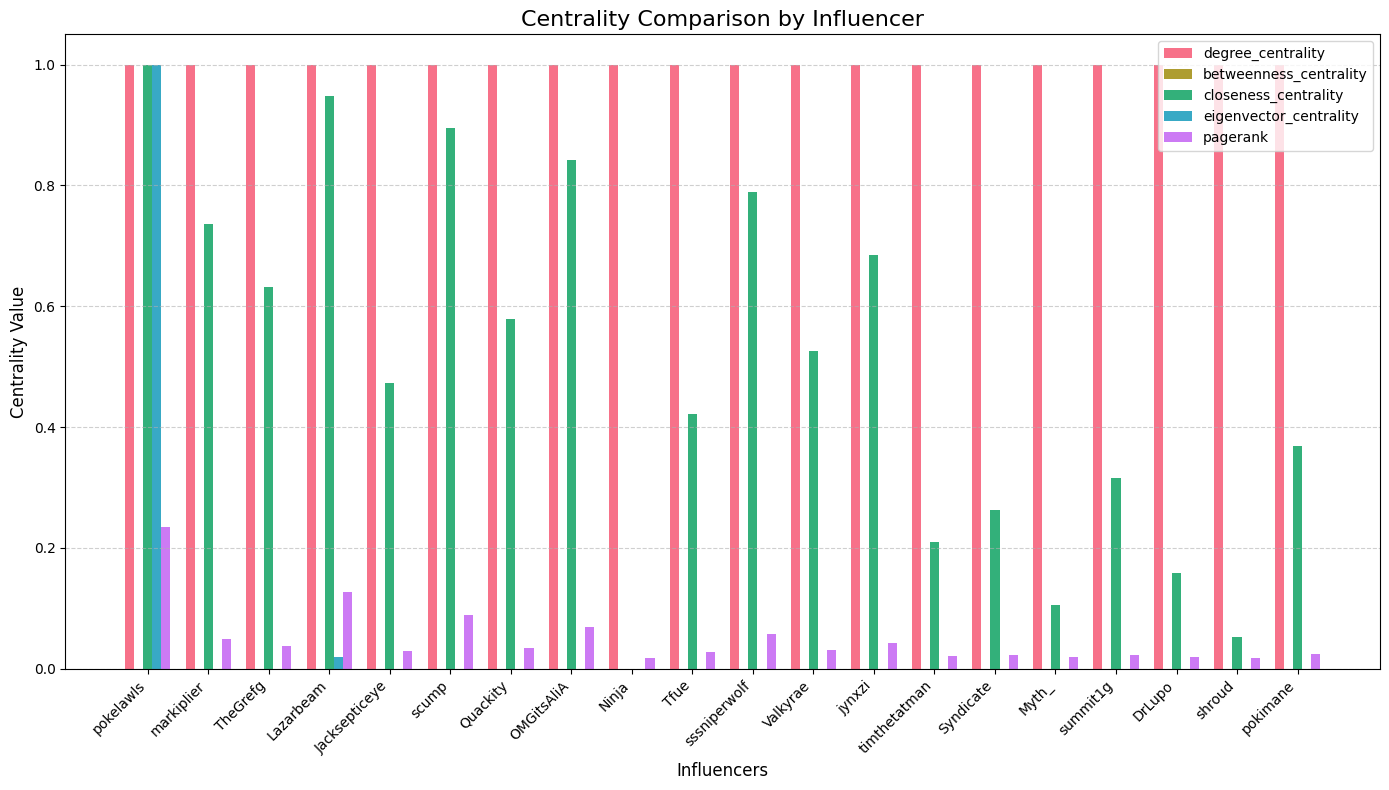

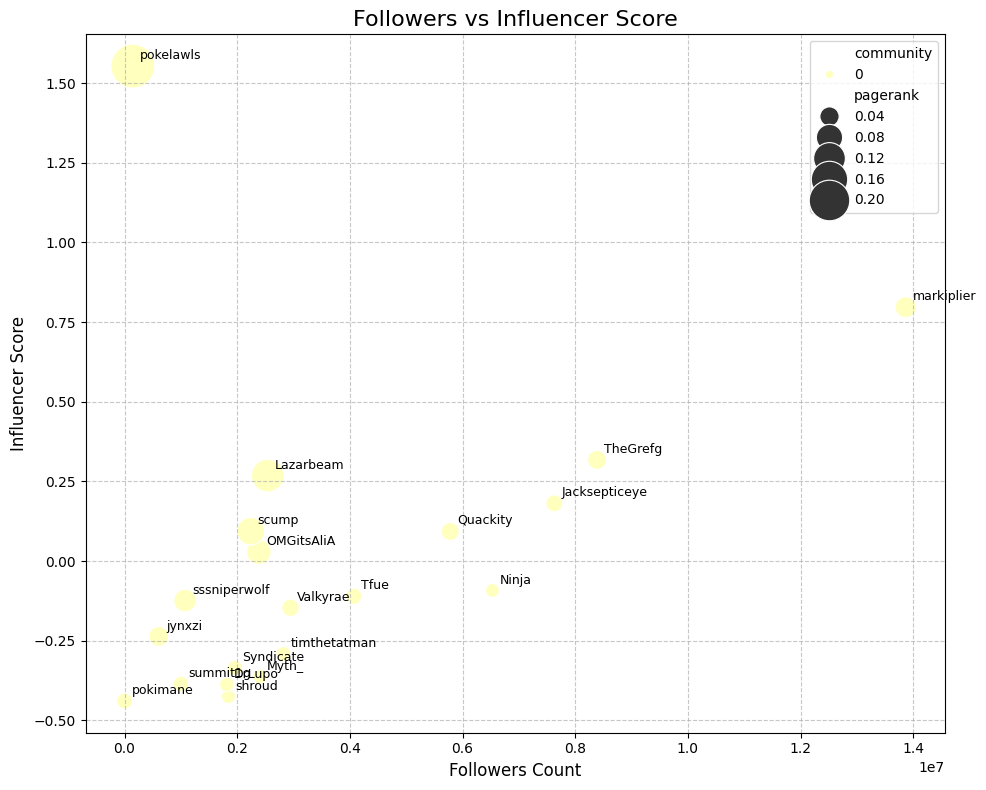

Top 5 Influencers Based on Composite Score:
             name    screen_name  followers_count  influencer_score
19           Poke      pokelawls         146727.0          1.553433
14           Mark     markiplier       13866618.0          0.796730
12       Grefg =)       TheGrefg        8386839.0          0.317742
18          LAZAR      Lazarbeam        2540601.0          0.268204
9   Jacksepticeye  Jacksepticeye        7628424.0          0.181433

Social network analysis completed!

Top influencers in each community based on influencer score:

Community 0:
   screen_name  followers_count  influencer_score
19   pokelawls         146727.0          1.553433
14  markiplier       13866618.0          0.796730
12    TheGrefg        8386839.0          0.317742

Total communities detected: 1


In [4]:
# Task 3: Social Network Analysis
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the influencer network graph
G = nx.read_gexf('data/influencer_network.gexf')

# === 1. CENTRALITY ANALYSIS ===
# Compute centrality metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
pagerank = nx.pagerank(G)

# Combine into DataFrame
centrality_df = pd.DataFrame({
    'user_id': list(G.nodes()),
    'degree_centrality': list(degree_centrality.values()),
    'betweenness_centrality': list(betweenness_centrality.values()),
    'closeness_centrality': list(closeness_centrality.values()),
    'eigenvector_centrality': list(eigenvector_centrality.values()),
    'pagerank': list(pagerank.values())
})

# Add influencer attributes from the graph
for i, node in enumerate(centrality_df['user_id']):
    centrality_df.loc[i, 'name'] = G.nodes[node]['name']
    centrality_df.loc[i, 'screen_name'] = G.nodes[node]['screen_name']
    centrality_df.loc[i, 'followers_count'] = float(G.nodes[node]['followers_count'])
    centrality_df.loc[i, 'friends_count'] = float(G.nodes[node]['friends_count'])
    centrality_df.loc[i, 'statuses_count'] = float(G.nodes[node]['statuses_count'])

# === 2. INFLUENCER SCORE ===
# Normalize centrality + followers data
scaler = StandardScaler()
features = ['degree_centrality', 'betweenness_centrality', 
            'closeness_centrality', 'eigenvector_centrality', 
            'pagerank', 'followers_count']
scaled_centrality = scaler.fit_transform(centrality_df[features])

# Weighted score
weights = [0.15, 0.10, 0.10, 0.25, 0.15, 0.25]
influencer_scores = np.dot(scaled_centrality, np.array(weights))
centrality_df['influencer_score'] = influencer_scores

# === 3. COMMUNITY DETECTION BASED ON GRAPH STRUCTURE ===
try:
    import community as community_louvain  # Make sure you have 'python-louvain' installed
except ImportError:
    raise ImportError("Please install it via pip: pip install python-louvain")

# Convert to undirected for better community detection
G_undirected = G.to_undirected()

# Run Louvain algorithm on the graph (structure-based)
partition = community_louvain.best_partition(G_undirected, resolution=1.0)

# Map communities back to the DataFrame
centrality_df['community'] = centrality_df['user_id'].map(partition)

# Assign community as node attribute in graph
nx.set_node_attributes(G, partition, 'community')

print("Community detection based on network structure (Louvain) completed.")


# === 4. ANALYSIS OUTPUT ===
# Save centrality metrics and scores
centrality_df.to_csv('data/influencer_centrality.csv', index=False)

# === 5. VISUALIZATIONS ===
# Network with influencer score + community
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
node_sizes = [(score + abs(min(influencer_scores)) + 1) * 2000 for score in influencer_scores]
node_colors = [centrality_df.loc[centrality_df['user_id'] == node, 'community'].values[0] for node in G.nodes()]


nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.7, cmap=plt.cm.Set2)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels={node: centrality_df.loc[centrality_df['user_id'] == node, 'screen_name'].values[0] for node in G.nodes()}, font_size=10)
plt.title("Influencer Network - Centrality & Community", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.savefig('data/influencer_analysis_network.png', dpi=300)
plt.show()
plt.close()

# Centrality bar comparison
plt.figure(figsize=(14, 8))
measure_cols = ['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'eigenvector_centrality', 'pagerank']
colors = sns.color_palette("husl", len(measure_cols))
sorted_df = centrality_df.sort_values('influencer_score', ascending=False)
x = np.arange(len(sorted_df))
width = 0.15

for i, column in enumerate(measure_cols):
    plt.bar(x + i*width, sorted_df[column], width, label=column, color=colors[i])

plt.xlabel('Influencers', fontsize=12)
plt.ylabel('Centrality Value', fontsize=12)
plt.title('Centrality Comparison by Influencer', fontsize=16)
plt.xticks(x + width*2, sorted_df['screen_name'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('data/centrality_comparison.png', dpi=300)
plt.show()
plt.close()

# Followers vs Influencer Score
plt.figure(figsize=(10, 8))
sns.scatterplot(x='followers_count', y='influencer_score',
                hue='community', size='pagerank', sizes=(100, 1000),
                data=centrality_df, palette='Spectral')

for i, row in centrality_df.iterrows():
    plt.annotate(row['screen_name'], (row['followers_count'], row['influencer_score']),
                 xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.title("Followers vs Influencer Score", fontsize=16)
plt.xlabel("Followers Count", fontsize=12)
plt.ylabel("Influencer Score", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('data/followers_vs_score.png', dpi=300)
plt.show()
plt.close()

# === 6. OUTPUT TOP INFLUENCERS AND COMMUNITY STATS ===
print("Top 5 Influencers Based on Composite Score:")
print(centrality_df[['name', 'screen_name', 'followers_count', 'influencer_score']].sort_values(by='influencer_score', ascending=False).head(5))

# print("\nCommunity Group Summary (mean influencer score per group):")
# print(centrality_df.groupby('community')['influencer_score'].mean().reset_index().sort_values(by='influencer_score', ascending=False))

print("\nSocial network analysis completed!")

print("\nTop influencers in each community based on influencer score:")
for comm_id in sorted(centrality_df['community'].unique()):
    print(f"\nCommunity {comm_id}:")
    top_group = centrality_df[centrality_df['community'] == comm_id].sort_values("influencer_score", ascending=False).head(3)
    print(top_group[['screen_name', 'followers_count', 'influencer_score']])
    
num_communities = len(set(partition.values()))
print(f"\nTotal communities detected: {num_communities}")




   username       date  followers_count  engagement_rate  degree_centrality  \
36   DrLupo 2023-01-01        1815757.0         0.178570                1.0   
37   DrLupo 2023-01-08        1815757.0         0.145517                1.0   
38   DrLupo 2023-01-15        1815757.0         0.154549                1.0   
39   DrLupo 2023-01-22        1815757.0         0.103821                1.0   
40   DrLupo 2023-01-29        1815757.0         0.109319                1.0   

    betweenness_centrality  closeness_centrality  eigenvector_centrality  \
36                     0.0              0.157895            2.214437e-32   
37                     0.0              0.157895            2.214437e-32   
38                     0.0              0.157895            2.214437e-32   
39                     0.0              0.157895            2.214437e-32   
40                     0.0              0.157895            2.214437e-32   

    pagerank  influencer_score  
36  0.020117         -0.438873  
37

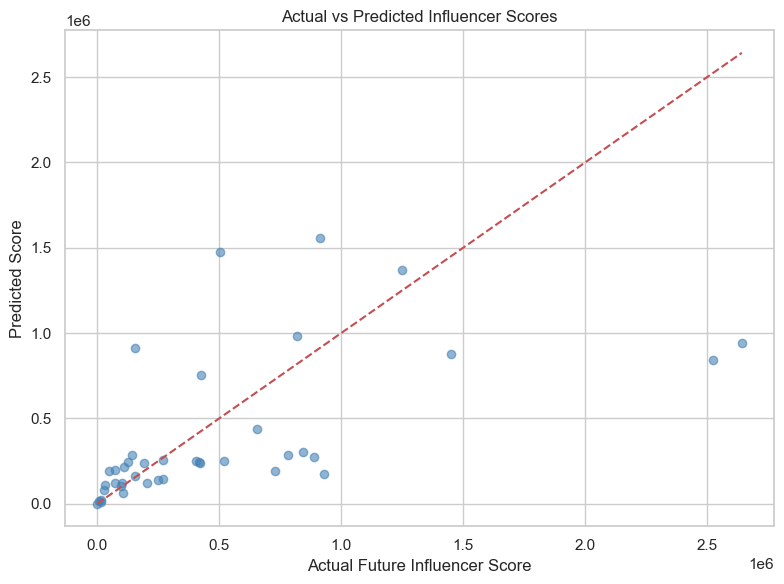

✅ Model trained to predict future influence based on centrality metrics.
✅ Loaded 305 tweets with timestamps.


/var/folders/3w/19212srd6l570wnj57kpg4c00000gn/T/ipykernel_59466/2716268292.py:161: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/3w/19212srd6l570wnj57kpg4c00000gn/T/ipykernel_59466/2716268292.py:162: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig("data/engagement_by_hour.png", dpi=300)
/Users/wenghong/anaconda3/envs/wif3009/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


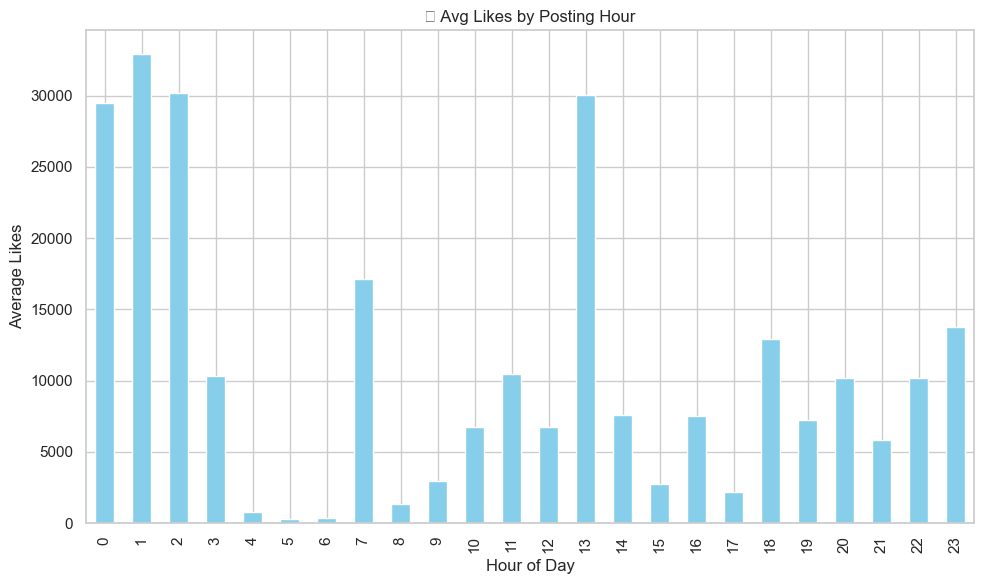

🕒 Best posting hour based on avg likes: 1:00


/var/folders/3w/19212srd6l570wnj57kpg4c00000gn/T/ipykernel_59466/2716268292.py:177: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/3w/19212srd6l570wnj57kpg4c00000gn/T/ipykernel_59466/2716268292.py:178: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  plt.savefig("data/sentiment_distribution.png", dpi=300)
/Users/wenghong/anaconda3/envs/wif3009/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


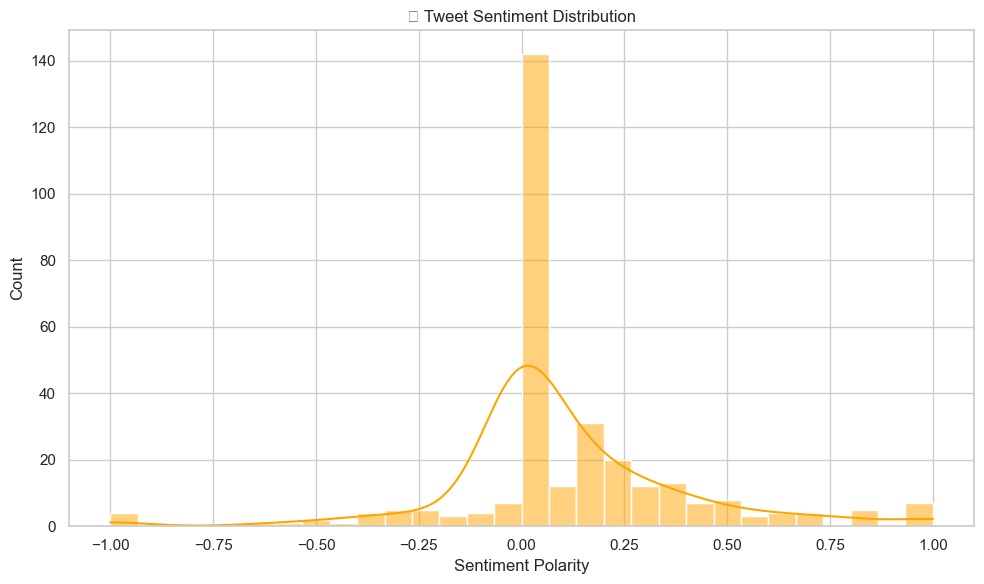

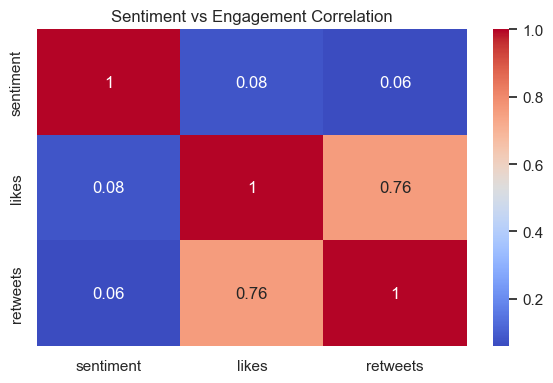

<Figure size 1000x600 with 0 Axes>

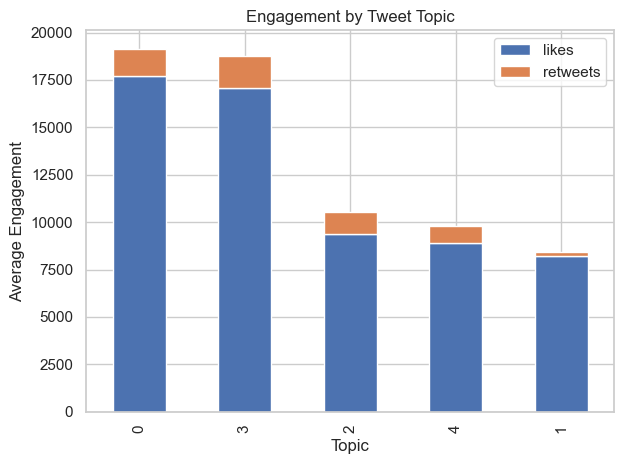


🗂 Top Keywords per Topic:
Topic 0: sure, streams, gta, chillin, going, youtube, twitch, live, summit1g, https
Topic 1: 000, edition, el, fortnite, minecraft, empire, rt, youtube, la, https
Topic 2: day, ranked, verdansk, d7tqjildgj, bxtd6meqh3, aillcw1jct, time, rt, live, https
Topic 3: house, talk, right, fight, la, today, tomorrow, new, just, https
Topic 4: live, en, stream, vs, today, major, optic, day, rt, https


/var/folders/3w/19212srd6l570wnj57kpg4c00000gn/T/ipykernel_59466/2716268292.py:237: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/3w/19212srd6l570wnj57kpg4c00000gn/T/ipykernel_59466/2716268292.py:238: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.savefig("data/top_influencer_rankings.png", dpi=300)
/Users/wenghong/anaconda3/envs/wif3009/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


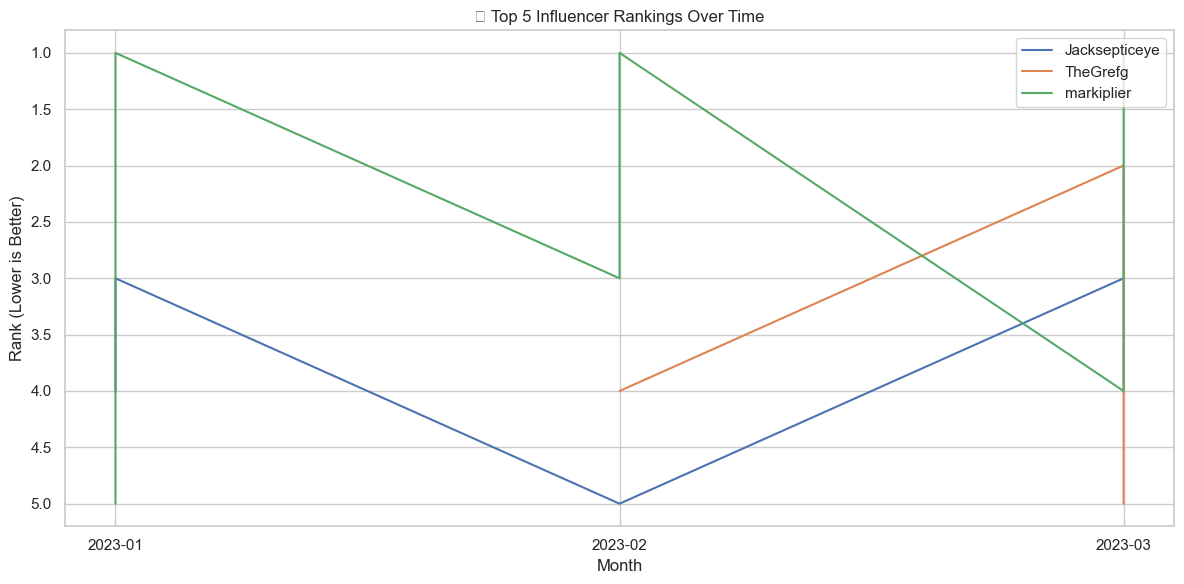


✅ Strategy Recommendations Based on Data:
• 🕒 Optimal posting time: 1:00
• 🔥 Topics with highest average engagement:
   - Topic 0 → Avg Likes: 17725.1, Retweets: 1428.8
   - Topic 3 → Avg Likes: 17080.9, Retweets: 1674.7
   - Topic 2 → Avg Likes: 9381.1, Retweets: 1175.9
• 🧠 Sentiment correlation with likes: 0.08
• 🔁 Sentiment correlation with retweets: 0.06


In [8]:
# ================================
# Task 4: Predict Future Influence + Engagement Strategy + NLP
# ================================

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from textblob import TextBlob
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

sns.set(style="whitegrid")

# ---------------------------------------
# PART A: Predict Future Influence
# ---------------------------------------

# Load influencer centrality time series data
import pandas as pd
import numpy as np

# Load the static centrality data
import pandas as pd
import numpy as np

# Load the static centrality data
df_static = pd.read_csv('data/influencer_centrality.csv')

# Simulate 12 weeks of data
dates = pd.date_range(start='2023-01-01', periods=12, freq='W')
np.random.seed(42)

synthetic_rows = []

for _, row in df_static.iterrows():
    for date in dates:
        engagement_rate = np.random.uniform(0.01, 0.2)  # Fake engagement rate
        influencer_score = row['influencer_score'] + np.random.normal(0, 0.05)

        synthetic_rows.append({
            'username': row['screen_name'],
            'date': date,
            'followers_count': row['followers_count'],
            'engagement_rate': engagement_rate,
            'degree_centrality': row['degree_centrality'],
            'betweenness_centrality': row['betweenness_centrality'],
            'closeness_centrality': row['closeness_centrality'],
            'eigenvector_centrality': row['eigenvector_centrality'],
            'pagerank': row['pagerank'],
            'influencer_score': influencer_score
        })

# Create final DataFrame
df = pd.DataFrame(synthetic_rows)
df = df.sort_values(['username', 'date'])

# Preview
print(df.head())


df = df.sort_values(['username', 'date'])

# Compute influencer score
df['influencer_score'] = df['followers_count'] * df['engagement_rate']

# Features to use
features = [
    'followers_count', 'engagement_rate',
    'degree_centrality', 'betweenness_centrality',
    'closeness_centrality', 'eigenvector_centrality', 'pagerank'
]

# Create lag features (t-1)
for feature in features:
    df[f'{feature}_lag1'] = df.groupby('username')[feature].shift(1)

# Create target (t+1)
df['influencer_score_next'] = df.groupby('username')['influencer_score'].shift(-1)

# Prepare modeling data
model_df = df.dropna(subset=[f'{feature}_lag1' for feature in features] + ['influencer_score_next'])
X = model_df[[f'{feature}_lag1' for feature in features]]
y = model_df['influencer_score_next']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, predictions)
print(f"📊 Mean Squared Error on Test Set: {mse:.4f}")

# Visualize prediction
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Future Influencer Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Influencer Scores")
plt.tight_layout()
plt.savefig("data/future_influence_predictions.png", dpi=300)
plt.show()

print("✅ Model trained to predict future influence based on centrality metrics.")

# ---------------------------------------
# PART B: Load Tweet Data
# ---------------------------------------

with open('data/tweets_data.json', 'r') as f:
    tweets = json.load(f)

rows = []
for user in tweets:
    instructions = user.get('tweets', {}).get('result', {}).get('timeline', {}).get('instructions', [])
    for instruction in instructions:
        if instruction.get('type') == 'TimelineAddEntries':
            entries = instruction.get('entries', [])
            for entry in entries:
                content = entry.get('content', {})
                item_content = content.get('itemContent', {})
                tweet_result = item_content.get('tweet_results', {}).get('result', {})
                legacy = tweet_result.get('legacy', {})
                text = legacy.get('full_text', "")
                timestamp = legacy.get('created_at', None)
                if text and timestamp:
                    try:
                        dt = datetime.strptime(timestamp, '%a %b %d %H:%M:%S %z %Y')
                        rows.append({
                            'text': text,
                            'hour': dt.hour,
                            'likes': legacy.get('favorite_count', 0),
                            'retweets': legacy.get('retweet_count', 0)
                        })
                    except Exception as e:
                        print(f"Skipping tweet due to error: {e}")

df_tweets = pd.DataFrame(rows)
print(f"✅ Loaded {len(df_tweets)} tweets with timestamps.")

# ---------------------------------------
# PART C: Optimal Posting Time
# ---------------------------------------

hourly_likes = df_tweets.groupby('hour')['likes'].mean()
best_hour = hourly_likes.idxmax()

plt.figure(figsize=(10, 6))
hourly_likes.plot(kind='bar', color='skyblue')
plt.title("📈 Avg Likes by Posting Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Likes")
plt.tight_layout()
plt.savefig("data/engagement_by_hour.png", dpi=300)
plt.show()

print(f"🕒 Best posting hour based on avg likes: {best_hour}:00")

# ---------------------------------------
# PART D: Sentiment Analysis
# ---------------------------------------

df_tweets['sentiment'] = df_tweets['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10, 6))
sns.histplot(df_tweets['sentiment'], bins=30, kde=True, color='orange')
plt.title("🧠 Tweet Sentiment Distribution")
plt.xlabel("Sentiment Polarity")
plt.tight_layout()
plt.savefig("data/sentiment_distribution.png", dpi=300)
plt.show()

sentiment_corr = df_tweets[['sentiment', 'likes', 'retweets']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(sentiment_corr, annot=True, cmap='coolwarm')
plt.title("Sentiment vs Engagement Correlation")
plt.tight_layout()
plt.savefig("data/sentiment_engagement_correlation.png", dpi=300)
plt.show()

# ---------------------------------------
# PART E: Topic Modeling & Engagement
# ---------------------------------------

vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_topics = vectorizer.fit_transform(df_tweets['text'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_topics)

df_tweets['topic'] = lda.transform(X_topics).argmax(axis=1)
topic_engagement = df_tweets.groupby('topic')[['likes', 'retweets']].mean().sort_values(by='likes', ascending=False)

plt.figure(figsize=(10, 6))
topic_engagement.plot(kind='bar', stacked=True)
plt.title("Engagement by Tweet Topic")
plt.xlabel("Topic")
plt.ylabel("Average Engagement")
plt.tight_layout()
plt.savefig("data/engagement_by_topic.png", dpi=300)
plt.show()

print("\n🗂 Top Keywords per Topic:")
for idx, topic in enumerate(lda.components_):
    top_keywords = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    print(f"Topic {idx}: {', '.join(top_keywords)}")

# ---------------------------------------
# PART F: Influencer Ranking Over Time
# ---------------------------------------

df_centrality = df.copy()
df_centrality['month'] = df_centrality['date'].dt.to_period('M')
df_centrality['rank'] = df_centrality.groupby('month')['influencer_score'].rank(ascending=False, method='min')

top_influencers = df_centrality[df_centrality['rank'] <= 5]

plt.figure(figsize=(12, 6))
for name in top_influencers['username'].unique():
    data = top_influencers[top_influencers['username'] == name]
    plt.plot(data['month'].astype(str), data['rank'], label=name)

plt.gca().invert_yaxis()
plt.legend()
plt.title("🏆 Top 5 Influencer Rankings Over Time")
plt.xlabel("Month")
plt.ylabel("Rank (Lower is Better)")
plt.tight_layout()
plt.savefig("data/top_influencer_rankings.png", dpi=300)
plt.show()

# ---------------------------------------
# PART G: Strategy Recommendations
# ---------------------------------------

print("\n✅ Strategy Recommendations Based on Data:")
print(f"• 🕒 Optimal posting time: {best_hour}:00")

print("• 🔥 Topics with highest average engagement:")
top_topics = topic_engagement.head(3)
for i, row in top_topics.iterrows():
    print(f"   - Topic {i} → Avg Likes: {row['likes']:.1f}, Retweets: {row['retweets']:.1f}")

print("• 🧠 Sentiment correlation with likes: {:.2f}".format(sentiment_corr.loc['sentiment', 'likes']))
print("• 🔁 Sentiment correlation with retweets: {:.2f}".format(sentiment_corr.loc['sentiment', 'retweets']))
